In [20]:
import numpy as np
import matplotlib.pyplot as pp
import seaborn

In [21]:
%matplotlib inline

In [49]:
import csv
with open('kiev_weather.csv', 'rb') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=';')
    rows = [(np.datetime64('-'.join(row[:3])+" "+row[3]+":00:00"),row[5]) for row in spamreader]
rows

[(numpy.datetime64('2017-01-26T00:00:00+0200'), -8.0703),
 (numpy.datetime64('2017-01-26T01:00:00+0200'), -8.1172),
 (numpy.datetime64('2017-01-26T02:00:00+0200'), -8.1875),
 (numpy.datetime64('2017-01-26T03:00:00+0200'), -8.3516),
 (numpy.datetime64('2017-01-26T04:00:00+0200'), -8.5625),
 (numpy.datetime64('2017-01-26T05:00:00+0200'), -8.8672),
 (numpy.datetime64('2017-01-26T06:00:00+0200'), -9.0938),
 (numpy.datetime64('2017-01-26T07:00:00+0200'), -9.4062),
 (numpy.datetime64('2017-01-26T08:00:00+0200'), -9.3281),
 (numpy.datetime64('2017-01-26T09:00:00+0200'), -9.0234),
 (numpy.datetime64('2017-01-26T10:00:00+0200'), -8.75),
 (numpy.datetime64('2017-01-26T11:00:00+0200'), -8.5078),
 (numpy.datetime64('2017-01-26T12:00:00+0200'), -7.9492),
 (numpy.datetime64('2017-01-26T13:00:00+0200'), -7.4414),
 (numpy.datetime64('2017-01-26T14:00:00+0200'), -7.9219),
 (numpy.datetime64('2017-01-26T15:00:00+0200'), -7.6914),
 (numpy.datetime64('2017-01-26T16:00:00+0200'), -7.6602),
 (numpy.datetime

In [53]:
data = np.array(rows,dtype=[('d','datetime64[s]'),('t',np.float16)])

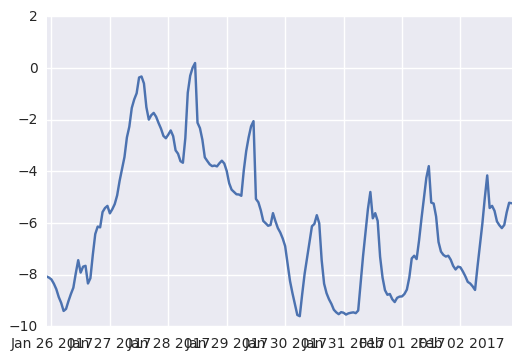

In [54]:
pp.plot(data['d'],data['t'])

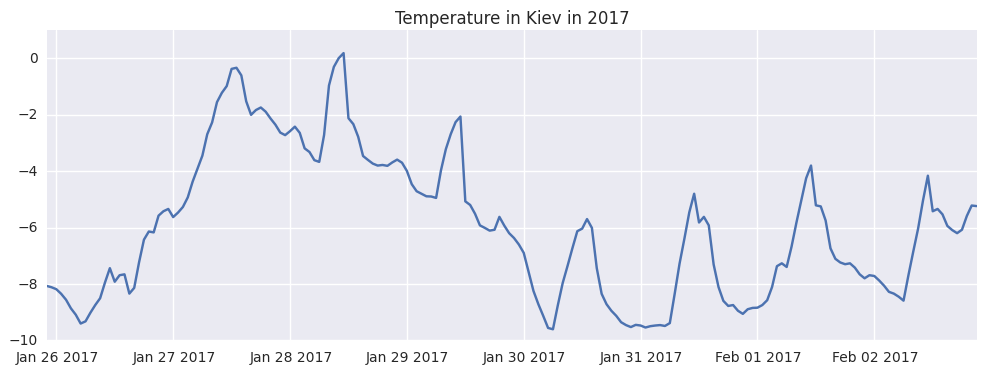

In [56]:
pp.figure(figsize=(12,4))
pp.title("Temperature in Kiev in 2017")
pp.axis(xmin=np.datetime64('2017-01-26T00:00:00+0200'),xmax=np.datetime64('2017-02-02T23:00:00+0200'),ymin=-10,ymax=1)
pp.plot(data['d'],data['t'])

In [61]:
def plot_smoothed(data,win=10):
    pp.figure(figsize=(12,4))
    pp.title("Temperature in Kiev in 2017")
    pp.axis(xmin=np.datetime64('2017-01-26T00:00:00+0200'),xmax=np.datetime64('2017-02-02T23:00:00+0200'),ymin=-10,ymax=1)
    smoothed = np.correlate(data['t'],np.ones(win)/win,'safe')
    pp.plot(data['d'],smoothed)

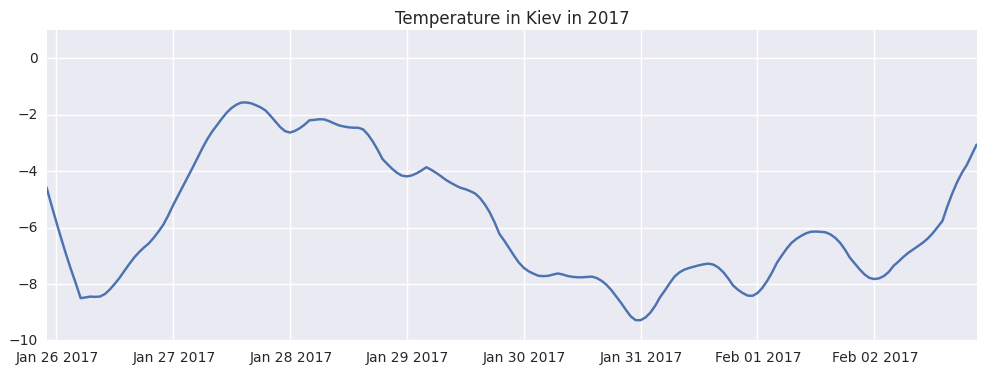

In [64]:
plot_smoothed(data,15)